# **👑DATA SCHOOL PROJECT12**  
**┗ 보험 관심고객 예측**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 보험 관심고객 예측
```  

> **프로젝트유형**

```
▶ 보험 데이터 활용 Classification(분류)

```

> **학습목표**

```
▶ 고객의 특성 및 이력 데이터를 바탕으로 보험 상품에 대한 관심도를 예측한다.
▶ 고객별 특성에 따른 관심도 차이를 이해하고, 타겟 마케팅 전략을 수립하는데 기여한다.
▶ Classification 모델의 성능을 평가하고 최적화하여 실제 업무에 적용 가능한 예측 모델을 구축한다.

```

> **예상 결과물**

```
▶ 보험 상품에 관심을 보일 가능성이 높은 고객 리스트
▶ Classification 모델의 성능 평가 리포트
▶ 고객 특성별 관심도 차이에 대한 분석 리포트

```


## **문제상황 Introduction**
---
> **시나리오**

```
보험회사 "SafeLife"는 최근 신규 가입자의 수가 뚜렷한 증가 추세를 보이지 않는다는 문제에 직면했다. "SafeLife"의 전략 기획팀은 현재 보험 상품에 관심을 보이는
고객들이 누구인지, 그리고 어떤 요소들이 고객들의 관심도에 영향을 주는지 파악하기 위해 Classification 모델을 도입하기로 결정했다.
```  

> **문제정의**

```
▶ 신규 가입자 수 증가 추세 둔화로 인한 수익 감소
```  

> **기대효과**

```
▶ 신규 가입자 수 증가로 수익 증대
▶ 선별적 고객 대상 마케팅으로 홍보 효율 개선
```

> **해결방안**

```
▶ classification 모델을 이용해 보험 상품에 관심있는 특정 고객군 대상으로 마케팅 진행
```

> **성과측정**  

```
▶ 대조군 대비 타겟 고객군 보험상품 가입률
▶ 모델 도입 전후 신규 가입자 증가 추이 비교
```

> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|id|ID|
|Gender|성별|
|Age|나이|
|Driving_License|운전 면허|
|Region_Code|지역 코드|
|Previously_Insured|이전에 보험 가입 여부|
|Vehicle_Age|차량 연령|
|Vehicle_Damage|차량 손상|
|Annual_Premium|연간 보험료|
|Policy_Sales_Channel|판매 채널|
|Vintage|회사와의 연관 지속 기간(일)|
|Response|응답|




In [10]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/zerobase/05.DataSchool/02.Personal_PJT/P_PJT12')
os.getcwd()

ModuleNotFoundError: No module named 'google.colab'

In [330]:
# ▶ Data read
import pandas as pd
import numpy as np
df = pd.read_csv('P_PJT12_DATA.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Process 01
---

### data 전처리
----

In [331]:
df.shape

(381109, 12)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [333]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [334]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [335]:
df.Response.value_counts().values[1] / len(df)

0.12256336113815208

전체적으로 12%의 고객이 응답률을 보인다. 

In [336]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [337]:
# id 변수는 데이터 분석에 중요하지 않은 변수이므로 미리 제거한다. 
df.drop('id', axis=1, inplace=True)

In [338]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [339]:
#범주형 변수, 연속형 변수 나누기
categoricals = ['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel','Response']
numericals = ['Age','Annual_Premium','Vintage']

In [340]:
df.Policy_Sales_Channel.nunique()

155

In [341]:
df.Region_Code = df.Region_Code.astype(int)
df.Policy_Sales_Channel = df.Policy_Sales_Channel.astype(int)

## **Process 02**
**응답 고객 특성 파악**
---


### Categorical 변수
---

In [342]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


#### Gender

In [343]:
df_pivot = df.pivot_table(index= 'Gender', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Gender,0,1,ratio
0,Female,156835,18185,10.4
1,Male,177564,28525,13.8


남녀간의 유의미한 차이가 나는 것 같지는 않다. 

#### Driving License

In [344]:
df_pivot = df.pivot_table(index= 'Driving_License', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Driving_License,0,1,ratio
0,0,771,41,5.0
1,1,333628,46669,12.3


운전면허 없는 사람의 응답률이 현저하게 낮다. 

In [345]:
from scipy.stats import chi2_contingency

matrix_list = df_pivot.iloc[:,:-1].values.tolist()
print(matrix_list)
# 카이제곱검정을 수행합니다.
chi2, p, _, _ = chi2_contingency(matrix_list)

# 유의확률을 출력합니다.
print("p-value:", p)

[[0, 771, 41], [1, 333628, 46669]]
p-value: 2.9174911787592687e-09


#### Region Code

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# sns.catplot(x='Region_Code', hue='Response', kind='count', data=df,palette='pastel',edgecolor='.6')

df_pivot = df.pivot_table(index= 'Region_Code', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values('ratio', ascending=False)

,Region_Code,0,1,ratio
38,38,1637,389,19.2
28,28,86498,19917,18.7
19,19,1285,250,16.3
4,4,1516,285,15.8
51,51,155,28,15.3
23,23,1660,300,15.3
24,24,2073,342,14.2
18,18,4475,678,13.2
7,7,2847,432,13.2
3,3,8070,1181,12.8


지역별로 응답률이 높은지역, 응답률이 낮은 지역으로 나뉜다. 특히, 28번 지역은 전체 고객수도 많고 응답률도 높았다.  

#### Previously Insured

In [346]:
df_pivot = df.pivot_table(index= 'Previously_Insured', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values('ratio', ascending=False)

,Previously_Insured,0,1,ratio
0,0,159929,46552,22.5
1,1,174470,158,0.1


보험에 이미 가입한 사람의 응답률이 극히 낮았고, 반면에 이전에 가입하지 않은 사람의 가입률은 상당히 높았다. 해당 변수는 중요한 요인으로 작용할 것으로 예상된다. 

#### Vehicle Age

In [347]:
df_pivot = df.pivot_table(index= 'Vehicle_Age', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Vehicle_Age,0,1,ratio
0,1-2 Year,165510,34806,17.4
1,< 1 Year,157584,7202,4.4
2,> 2 Years,11305,4702,29.4


차량 연령이 1년 미만일 경우 응답률이 낮지만, 1년 이후부터는 응답률이 눈에띄게 상승함을 알 수 있다. 특히 2년 이후에는 응답률이 약 30%까지 상승한다. 

#### Vehicle Damage

In [348]:
df_pivot = df.pivot_table(index= 'Vehicle_Damage', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Vehicle_Damage,0,1,ratio
0,No,187714,982,0.5
1,Yes,146685,45728,23.8


차량이 손상입지 않은 사람들의 응답률은 매우 낮지만, 반대로 손상입은 사람의 응답률이 높게 나옴을 알 수 있다. 

#### Policy Sales Channel

In [349]:
df_pivot = df.pivot_table(index= 'Policy_Sales_Channel', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot.sort_values('ratio', ascending=False).head(20)

,Policy_Sales_Channel,0,1,ratio
26,28,2.0,1.0,33.3
25,27,2.0,1.0,33.3
34,36,35.0,17.0,32.7
148,155,839.0,395.0,32.0
154,163,2013.0,880.0,30.4
2,3,364.0,159.0,30.4
116,121,45.0,19.0,29.7
82,87,5.0,2.0,28.6
77,81,10.0,4.0,28.6
76,80,10.0,4.0,28.6


응답률이 높은 채널이 보이지만, 몇몇 채널에서는 사람 수가 너무 적어 응답률에 대한 신뢰도가 낮다. 만약 차후에 해당 변수를 분석에 사용할 경우, 인구수가 낮은 채널을 필터링해서 제외해야 할 것이다. 

### Numerical 변수
---

In [350]:
df[numericals].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


#### Age

<Axes: xlabel='Age', ylabel='Count'>

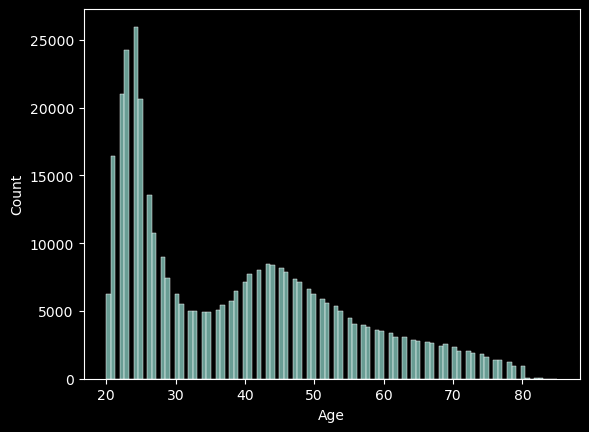

In [351]:
sns.histplot(df.Age)

In [352]:
#구간화. 챗GPT한테 물어보니 보험업계에서는 해당 연령대로 고객을 구분한다고 한다. 

df['Age_gp'] = np.where(df['Age'] <= 25, '~25',\
                                  np.where(df['Age'] <= 50, '26~50',\
                                           np.where(df.Age <= 65, '51~65', '66~')))

df[['Age', 'Age_gp']].head()

,Age,Age_gp
0,44,26~50
1,76,66~
2,47,26~50
3,21,~25
4,29,26~50


In [353]:
df_pivot = df.pivot_table(index= 'Age_gp', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Age_gp,0,1,ratio
0,26~50,147302,30758,17.3
1,51~65,50905,9570,15.8
2,66~,25734,2335,8.3
3,~25,110458,4047,3.5


26~50세 구간이 응답률이 가장 많다. 66세 이상 노인은 사고확률이 높기때문에 보험사에서 위험고객군으로 판단되어 응답률이 큰 의미가 없을것이고, 25세 미만 고객은 보험료가 비싸니 가입을 안할 것이다(대신에 부모님 명의로 보험가입할듯)

#### Annual Premium

<Axes: xlabel='Annual_Premium', ylabel='Count'>

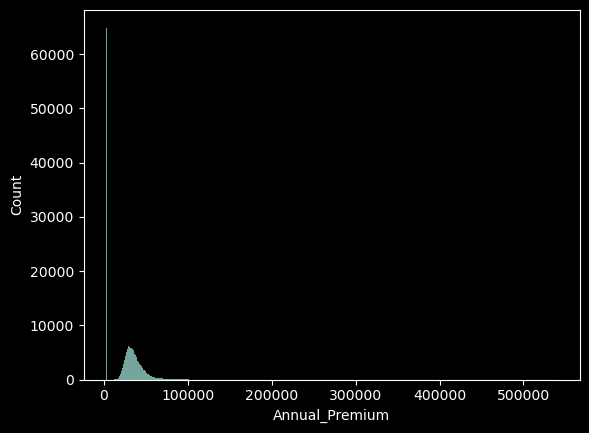

In [354]:
sns.histplot(df.Annual_Premium)

저가 보험에 사람들이 많이 가입하는 경향이 있는듯 하다. 

In [355]:
#구간화

df['Annual_Premium_gp'] = np.where(df.Annual_Premium <= 24000, '~24000',\
                                  np.where(df.Annual_Premium <= 32000, '24000~32000',\
                                           np.where(df.Annual_Premium <= 39000, '32000~39000', '39000~')))

df[['Annual_Premium', 'Annual_Premium_gp']].head()

,Annual_Premium,Annual_Premium_gp
0,40454.0,39000~
1,33536.0,32000~39000
2,38294.0,32000~39000
3,28619.0,24000~32000
4,27496.0,24000~32000


In [356]:
df_pivot = df.pivot_table(index= 'Annual_Premium_gp', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Annual_Premium_gp,0,1,ratio
0,24000~32000,92636,10809,10.4
1,32000~39000,76251,10601,12.2
2,39000~,84581,14390,14.5
3,~24000,80931,10910,11.9


대체로 뚜렷한 경향성을 보이지는 않는 것 같다. 다만 39000 이상일때 고객의 응답률이 제일 높았다. 

#### Vintage

<Axes: xlabel='Vintage', ylabel='Count'>

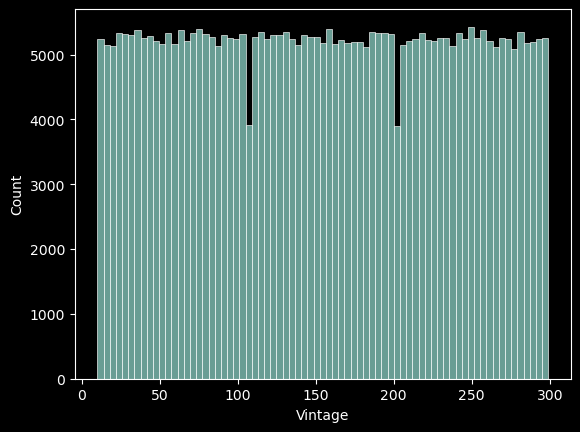

In [357]:
sns.histplot(df.Vintage)

In [358]:
#구간화

df['Vintage_gp'] = np.where(df.Vintage <= 100, '~100',\
                                  np.where(df.Vintage <= 200, '100~200', '200~'))

df[['Vintage', 'Vintage_gp']].head()

,Vintage,Vintage_gp
0,217,200~
1,183,100~200
2,27,~100
3,203,200~
4,39,~100


In [359]:
df_pivot = df.pivot_table(index= 'Vintage_gp', columns='Response', aggfunc='size')
df_pivot.reset_index(inplace=True)
df_pivot.columns.names=['']
df_pivot['ratio'] = round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,Vintage_gp,0,1,ratio
0,100~200,115431,16138,12.3
1,200~,113831,15892,12.3
2,~100,105137,14680,12.3


응답률에 아무 변동도 안보인다. 

## **Process 03**
**ML 활용 고객 응답률 예측**
---

### Feature Engineering
---

C:\Users\dldid\AppData\Local\Temp\ipykernel_21660\1146168607.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'] , fit=norm);



 mu = 38.82 and sigma = 15.51



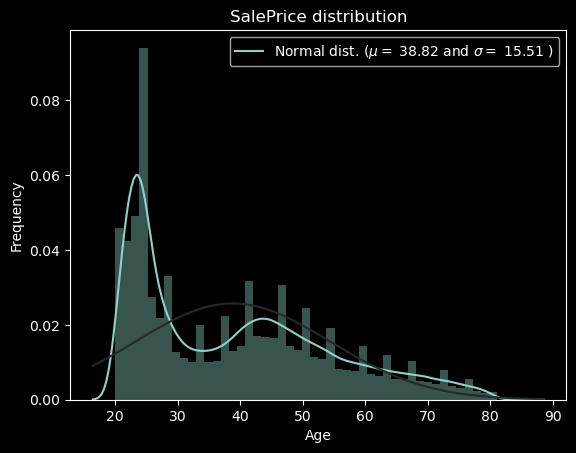

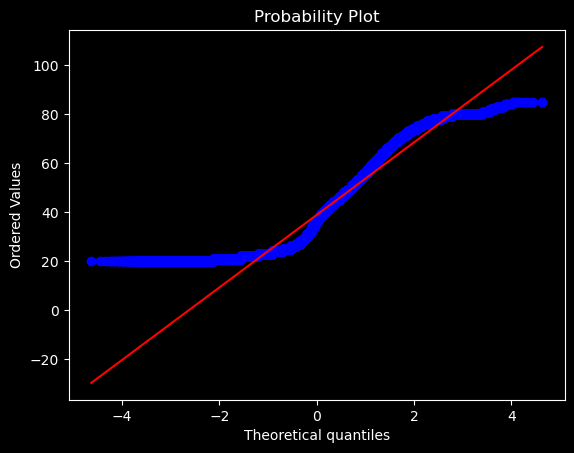

In [360]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df['Age'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Age'], plot=plt)
plt.show()

분포가 왼쪽에 치우쳤다. 

C:\Users\dldid\AppData\Local\Temp\ipykernel_21660\4058345343.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Age'] , fit=norm);



 mu = 3.61 and sigma = 0.38



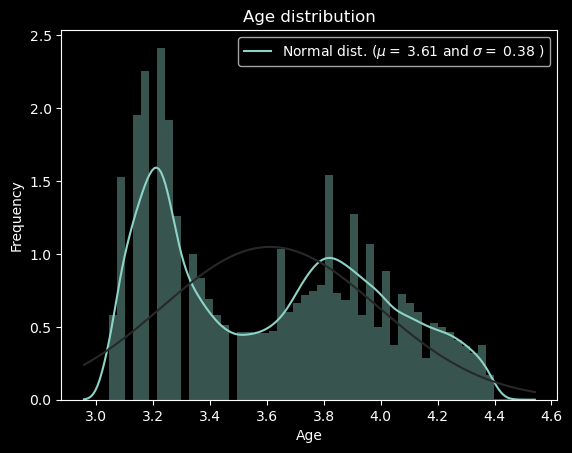

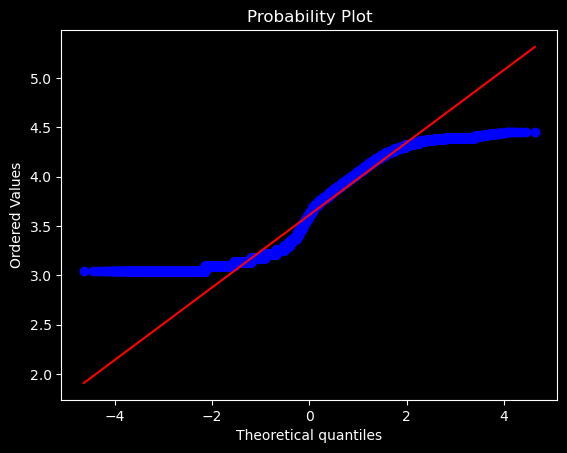

In [361]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_new = df.copy()
df_new["Age"] = np.log1p(df_new["Age"])

#Check the new distribution 
sns.distplot(df_new['Age'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_new['Age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Age distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_new['Age'], plot=plt)
plt.show()

조금은 해소된듯 하다. 

In [362]:
len(df[df.Annual_Premium > 100000])

778

<Axes: xlabel='Annual_Premium', ylabel='Count'>

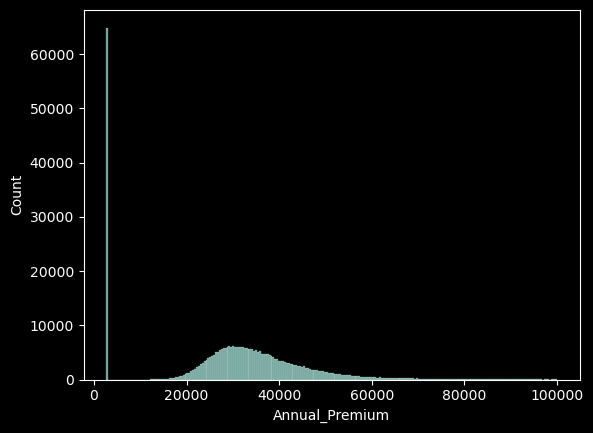

In [363]:
sns.histplot(df[df.Annual_Premium < 100000].Annual_Premium)

Annual Premium은 그냥 그룹화해서 다루는게 낫지않을까? 

In [364]:
df_group = df.groupby('Policy_Sales_Channel').size().sort_values(ascending=False)
channelindex = df_group[df_group>50].index
df = df[df.Policy_Sales_Channel.isin(channelindex)]
df.groupby('Policy_Sales_Channel').size().sort_values(ascending=False)

Policy_Sales_Channel
152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
65         59
107        54
106        52
36         52
159        51
Length: 78, dtype: int64

<Axes: xlabel='Policy_Sales_Channel', ylabel='count'>

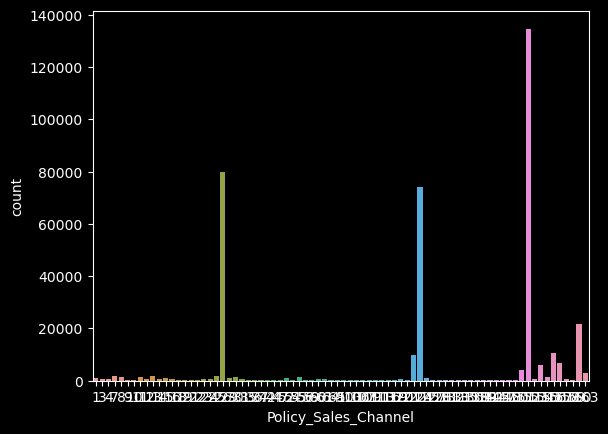

In [365]:
zz = df.Policy_Sales_Channel.value_counts().reset_index()
sns.barplot(x=zz.columns[0], y=zz.columns[1], data=zz)

In [366]:
df_new = pd.get_dummies(data=df_new, columns=['Policy_Sales_Channel', 'Region_Code'], prefix_sep='-')
df_new.columns[:12]
cols = list(df_new.columns[12:])
a = df_new.iloc[:,12:].astype(int)
b = df_new.iloc[:,:12]
df_new = pd.concat([b,a],axis=1)
df_new.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Age_gp,...,Region_Code-43,Region_Code-44,Region_Code-45,Region_Code-46,Region_Code-47,Region_Code-48,Region_Code-49,Region_Code-50,Region_Code-51,Region_Code-52
0,Male,3.806662,1,0,> 2 Years,Yes,40454.0,217,1,26~50,...,0,0,0,0,0,0,0,0,0,0
1,Male,4.343805,1,0,1-2 Year,No,33536.0,183,0,66~,...,0,0,0,0,0,0,0,0,0,0
2,Male,3.871201,1,0,> 2 Years,Yes,38294.0,27,1,26~50,...,0,0,0,0,0,0,0,0,0,0
3,Male,3.091042,1,1,< 1 Year,No,28619.0,203,0,~25,...,0,0,0,0,0,0,0,0,0,0
4,Female,3.401197,1,1,< 1 Year,No,27496.0,39,0,26~50,...,0,0,0,0,0,0,0,0,0,0


### 모델링을 위한 데이터 준비
---

In [367]:
df_new.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Age_gp,...,Region_Code-43,Region_Code-44,Region_Code-45,Region_Code-46,Region_Code-47,Region_Code-48,Region_Code-49,Region_Code-50,Region_Code-51,Region_Code-52
0,Male,3.806662,1,0,> 2 Years,Yes,40454.0,217,1,26~50,...,0,0,0,0,0,0,0,0,0,0
1,Male,4.343805,1,0,1-2 Year,No,33536.0,183,0,66~,...,0,0,0,0,0,0,0,0,0,0
2,Male,3.871201,1,0,> 2 Years,Yes,38294.0,27,1,26~50,...,0,0,0,0,0,0,0,0,0,0
3,Male,3.091042,1,1,< 1 Year,No,28619.0,203,0,~25,...,0,0,0,0,0,0,0,0,0,0
4,Female,3.401197,1,1,< 1 Year,No,27496.0,39,0,26~50,...,0,0,0,0,0,0,0,0,0,0


In [368]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#이전 분석 결과 Gender, Vintage 변수의 value 차이 대비 응답률 변화가 없어, 모델링에서 제외한다. 

X=df_new.drop(['Vintage_gp',
           'Gender', 'Vintage', 'Annual_Premium', 'Age',
           #'Policy_Sales_Channel', 'Region_Code', 'Annual_Premium_gp', 'Age_gp',  
           'Response'], axis=1)
Y=df_new['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(266776, 214)
(266776,)
(114333, 214)
(114333,)


In [369]:
#categoricals.remove(['Gender','Region_Code','Policy_Sales_Channel'])
for x in categoricals:
    print(x, df[x].dtype)

Gender object
Driving_License int64
Region_Code int32
Previously_Insured int64
Vehicle_Age object
Vehicle_Damage object
Policy_Sales_Channel int32
Response int64


In [370]:
label_category = ['Vehicle_Age', 
                  #'Gender',
                  'Vehicle_Damage',
                  'Annual_Premium_gp',
                  'Age_gp'
                  ]

In [371]:
from sklearn.preprocessing import LabelEncoder

for col in label_category:
  le = LabelEncoder()
  le.fit(list(x_train[col].values) + list(x_test[col].values))
  x_train[col] = le.transform(x_train[col])
  x_test[col] = le.transform(x_test[col])

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266776 entries, 30116 to 223637
Columns: 214 entries, Driving_License to Region_Code-52
dtypes: int32(212), int64(2)
memory usage: 221.9 MB


### 모델 학습 및 평가
---

#### Light GBM

In [372]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label = y_train)

params = {}
params [ 'learning_rate'] = 0.05
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for binary-class
params [ 'max_depth'] = 5
params [ 'num_leaves' ] = 5 # 최대 leaves는 2^(max_depth)
params ['seed'] = 23456

clf = lgb.train (params, d_train, 1000)

# params = {}
# params['objective'] = 'binary'
# params['num_leaves'] = '5'
# params['learning_rate'] = 0.05
# params['n_estimators'] = 1000
# params['max_bin'] = 55
# params['metric'] = 'binary_logloss'
# params['feature_fraction_seed'] = 9
# params['bagging_seed'] = 9

# clf = lgb.train (params, d_train, 500)

[LightGBM] [Info] Number of positive: 32697, number of negative: 234079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 266776, number of used features: 144
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122563 -> initscore=-1.968375
[LightGBM] [Info] Start training from score -1.968375


In [373]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.3:       # setting threshold to .3
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.3:       # setting threshold to .3
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89    234079
           1       0.36      0.57      0.44     32697

    accuracy                           0.82    266776
   macro avg       0.65      0.71      0.67    266776
weighted avg       0.86      0.82      0.84    266776

              precision    recall  f1-score   support

           0       0.93      0.86      0.89    100320
           1       0.35      0.56      0.43     14013

    accuracy                           0.82    114333
   macro avg       0.64      0.71      0.66    114333
weighted avg       0.86      0.82      0.84    114333



In [374]:
#roc score
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8580257368244611
roc_score_test : 0.8543249413195835


C:\Users\dldid\AppData\Local\Temp\ipykernel_21660\1982863770.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


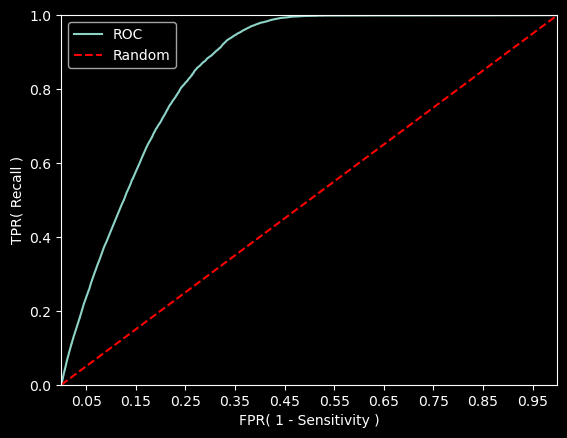

In [375]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    # FPR : 암환자가 아닌 환자를 암환자라고 잘 못 예측한 비율
    # TPR : Recall
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, y_pred_test_proba)

### 중요 변수 파악
---

{'Driving_License': 45.0, 'Previously_Insured': 164.0, 'Vehicle_Age': 370.0, 'Vehicle_Damage': 224.0, 'Age_gp': 402.0, 'Annual_Premium_gp': 277.0, 'Policy_Sales_Channel': 9.116129032258064, 'Region_Code': 20.849056603773583}


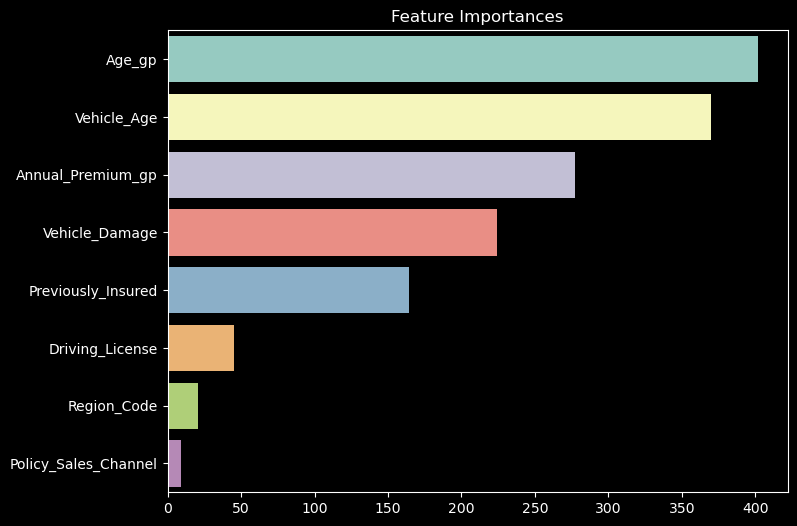

In [376]:
# 모든 더미 변수들의 중요도 확인
all_dummy_importances = clf.feature_importance()

# 각 범주형 변수에 대한 중요도를 저장할 딕셔너리 초기화
categorical_importances = {}

# 더미 변수들의 중요도를 범주형 변수별로 합산하여 저장
for feature_name, importance in zip(X.columns, all_dummy_importances):
    category = feature_name.split('-')[0]  # 더미 변수의 범주형 변수 추출
    if category not in categorical_importances:
        categorical_importances[category] = []
    categorical_importances[category].append(importance)

# 범주형 변수의 중요도를 평균하여 저장
average_categorical_importances = {}
for category, importances in categorical_importances.items():
    average_importance = np.mean(importances)
    average_categorical_importances[category] = average_importance

# 결과 출력
#print(average_categorical_importances)

ftr_importances = pd.Series(average_categorical_importances,index=average_categorical_importances.keys())
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

목표 가입률 : 25%에서 최대한 많은 고객수를 끌어온다고 가정해보자. 

In [406]:
totalgroup = []
group = df[(df.Age_gp == '26~50') & (df.Vehicle_Age == '> 2 Years')].index
totalgroup.extend(group)
len(df[(df.index.isin(totalgroup)) & (df.Response == 1)]) / len(df[df.index.isin(totalgroup)]), len(df[df.index.isin(totalgroup)])

(0.3528548123980424, 6130)

In [409]:
group = df[(df.Age_gp == '26~50') & (df.Vehicle_Age == '1-2 Year') & (df.Vehicle_Damage == 'Yes')].index

#len(df[(df.index.isin(group)) & (df.Response == 1)]) / len(df[df.index.isin(group)]), len(df[df.index.isin(group)])

totalgroup.extend(group)
len(df[(df.index.isin(totalgroup)) & (df.Response == 1)]) / len(df[df.index.isin(totalgroup)]), len(df[df.index.isin(totalgroup)])

(0.3151547428841943, 84495)

In [415]:
group = df[(df.Age_gp == '51~65') & (df.Vehicle_Age == '> 2 Years') ].index

#len(df[(df.index.isin(group)) & (df.Response == 1)]) / len(df[df.index.isin(group)]), len(df[df.index.isin(group)])

totalgroup.extend(group)
len(df[(df.index.isin(totalgroup)) & (df.Response == 1)]) / len(df[df.index.isin(totalgroup)]), len(df[df.index.isin(totalgroup)])

(0.3136317160856229, 90957)

30%를 유지하기에는 여기까지가 한계다. 

1. 나이가 26~50세이고 차량이 2년이상 된 고객 그룹
2. 나이가 26~50세이고 차량이 1~2년 되었으며 차량 손상 내역이 있는 고객 그룹
3. 나이가 51~65세이고 차량이 2년이상 된 고객 그룹

위 3가지 경우의 고객 그룹을 모두 포함했을 때, 응답률이 31%이며 이들은 전체 고객데이터 중 23%에 해당하는 비율이다. 

---
## **Lesson Learned**
---

샘플 프로젝트에서는 모델링 결과만 보여주고 추가적인 분석을 진행하지 않아 부족한 느낌이었는데, 개인프로젝트에서 이렇게 부족함을 채워줄 수 있었다. 그 결과 전체 데이터 대비 3배 높은 응답률을 보이는 고객군을 추출해볼 수 있었다. 

Region_Code, Policy_Sales_Channel 변수의 경우 연속형 변수로 취급해야하나 했지만, 데이터 특성을 생각해보면 범주형 데이터로 취급하는게 맞는 것 같다. 또한 마지막 세부 분석을 진행할 때 인구수가 작은 channel 또는 region을 제외하고 분석을 했던 부분이 개인적으로 기억에 남는다. 

데이터 수가 많고 결측값도 없어서 전반적으로 무난했던 프로젝트였던것 같다. 